In [2]:
# Install Tensorflow
import tensorflow as tf
print(tf.__version__)


2.13.0


In [3]:
#other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
#Make a dataset
N = 1000
X = np.random.random((N,2)) * 6 - 3 #uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

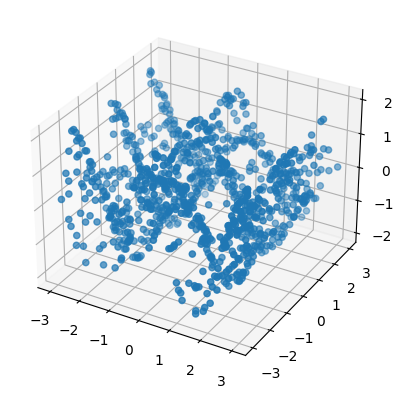

In [7]:
#plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [9]:
#Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)# this is regression so no activation function at the end
])

In [10]:
#compile and fit
opt = tf.keras.optimizers.Adam(0.01) #sometimes giveing adam as optiimizer might not ive great results so we use instance to create adam optimizer with learning rate value
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.9261
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8803
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8737
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8685
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7973
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7525
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7082
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6238
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6118
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5949
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5592
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5624
Epoch 13/100
32/32 [=================

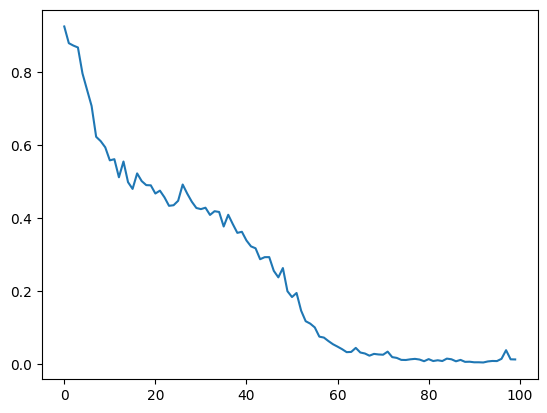

In [11]:
#plot the loss
plt.plot(r.history['loss'], label='loss')

79/79 [==============================] - 1s 6ms/step


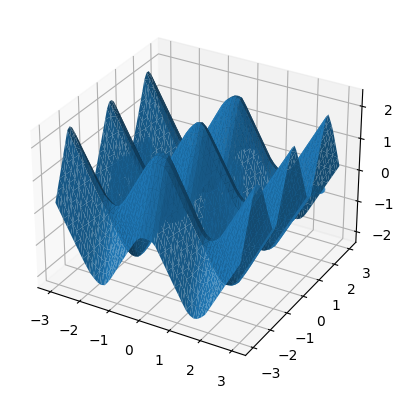

In [14]:
#Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], Y)

#surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 2ms/step


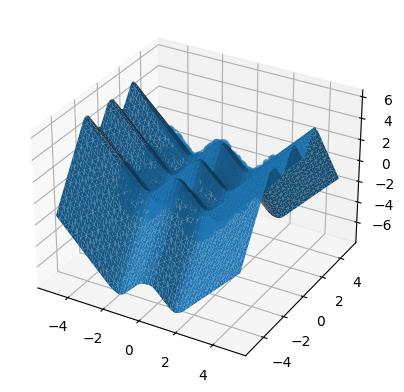

In [15]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()